### Problem Statement 

**BigMart is a retail chain that operates multiple outlets across various cities. The company wants to understand the key factors affecting the sales of its products**

#### content

**The dataset contains historical sales data for various products across multiple BigMart outlets, including item details, outlet characteristics, and sales figures. It is used to analyze and predict factors influencing retail product sales.**

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df1= pd.read_csv(r"C:\Users\saiku\Downloads\dataset\data.csv")

In [11]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.380000
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2213.476465
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2349.547110
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1892.981544
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,4533.564958


In [43]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


**The dataset contains 12 columns and 14204 rows of data with dependent column of "Item_Outlet_Sales"**

In [48]:
df1.shape

(14204, 12)

In [50]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2099.333529
std,4.652502,0.051459,62.086938,8.371664,1542.432736
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,878.856000
50%,12.600000,0.054021,142.247000,1999.000000,1828.273366
75%,16.750000,0.094037,185.855600,2004.000000,2949.298043
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [52]:
df1["Outlet_Location_Type"].value_counts()

Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: count, dtype: int64

<Axes: ylabel='Item_Outlet_Sales'>

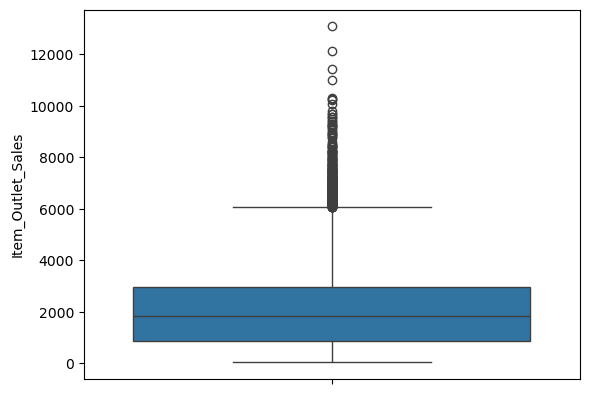

In [54]:
sns.boxplot(df1["Item_Outlet_Sales"])

**There are outliers in my data. first have to treat outliers**

In [57]:
df1["Item_Outlet_Sales"].describe()

count    14204.000000
mean      2099.333529
std       1542.432736
min         33.290000
25%        878.856000
50%       1828.273366
75%       2949.298043
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [59]:
Q1 = np.percentile(df1["Item_Outlet_Sales"],25)

In [61]:
Q1

878.856

In [65]:
Q2 = np.percentile(df1["Item_Outlet_Sales"],50)

In [69]:
Q2

1828.2733662330104

In [71]:
Q3 = np.percentile(df1["Item_Outlet_Sales"],75)

In [75]:
Q3

2949.2980431405085

In [79]:
IQR = Q3-Q1

In [81]:
IQR

2070.4420431405088

In [83]:
lower_boundary = Q1 - (1.5*IQR)

In [85]:
lower_boundary

-2226.8070647107634

In [87]:
upper_boundary = Q3 + (1.5 * IQR)

In [89]:
upper_boundary

6054.961107851272

In [93]:
df1["Item_Outlet_Sales"].min(), df1["Item_Outlet_Sales"].max()

(33.29, 13086.9648)

In [95]:
(df1["Item_Outlet_Sales"]<lower_boundary) & (df1["Item_Outlet_Sales"]>upper_boundary)

0        False
1        False
2        False
3        False
4        False
         ...  
14199    False
14200    False
14201    False
14202    False
14203    False
Name: Item_Outlet_Sales, Length: 14204, dtype: bool

In [97]:
df1[(df1["Item_Outlet_Sales"]<lower_boundary) | (df1["Item_Outlet_Sales"]>upper_boundary)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
43,FDC02,21.350,Low Fat,0.069103,Canned,259.9278,OUT018,2009,Medium,Tier 3,Supermarket Type2,6768.522800
55,FDK21,7.905,Low Fat,0.010053,Snack Foods,249.0408,OUT018,2009,Medium,Tier 3,Supermarket Type2,6258.520000
130,FDY25,NaN,Low Fat,0.033810,Canned,180.5976,OUT027,1985,Medium,Tier 3,Supermarket Type3,7968.294400
132,NCR53,NaN,Low Fat,0.144338,Health and Hygiene,224.4404,OUT027,1985,Medium,Tier 3,Supermarket Type3,6976.252400
145,FDP16,18.600,Low Fat,0.039356,Frozen Foods,246.3802,OUT049,1999,Medium,Tier 1,Supermarket Type1,7370.406000
...,...,...,...,...,...,...,...,...,...,...,...,...
12580,FDN22,NaN,Regular,0.000000,Snack Foods,252.6724,OUT027,1985,Medium,Tier 3,Supermarket Type3,6582.434583
13323,FDT37,NaN,Low Fat,0.035099,Canned,255.6014,OUT027,1985,Medium,Tier 3,Supermarket Type3,6447.306658
13444,FDN51,NaN,reg,0.020845,Meat,260.5936,OUT027,1985,Medium,Tier 3,Supermarket Type3,6101.060594
13796,NCT05,NaN,Low Fat,0.020850,Health and Hygiene,255.8672,OUT027,1985,Medium,Tier 3,Supermarket Type3,6144.681924


**These are the outleirs data in my dataset**

In [103]:
df1[(df1["Item_Outlet_Sales"] > lower_boundary) & (df1["Item_Outlet_Sales"]<upper_boundary)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.380000
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2213.476465
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2349.547110
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,1892.981544
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,4533.564958


**These are the non-outliers data**

C:\Users\saiku\AppData\Local\Temp\ipykernel_9992\3223694842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='Item_Type', y='Item_Outlet_Sales', palette='viridis')


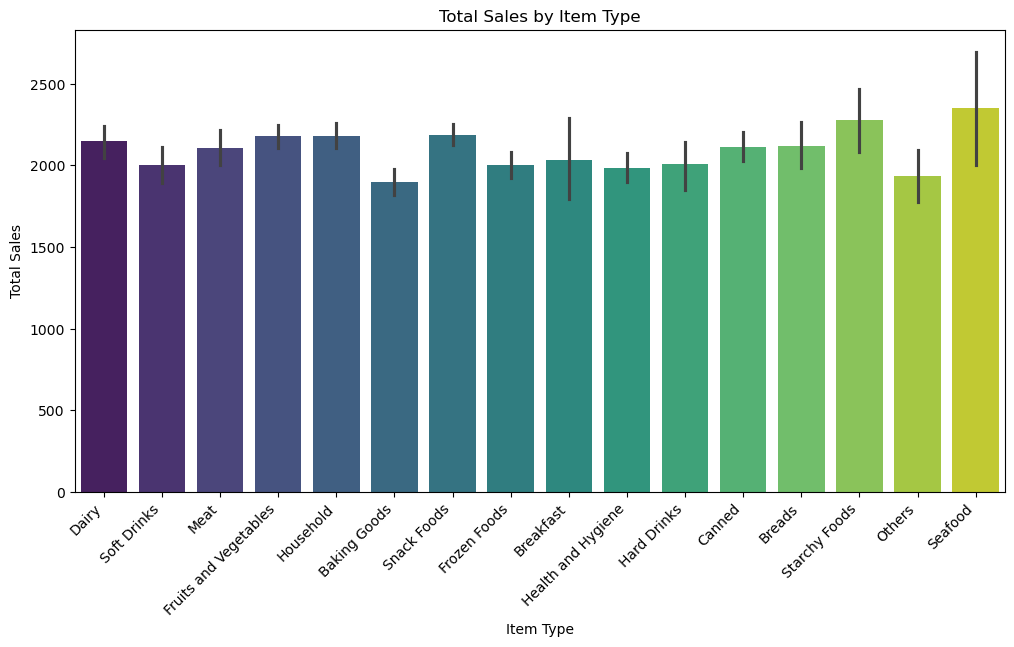

In [119]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x='Item_Type', y='Item_Outlet_Sales', palette='viridis')
plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

**From the above graph, the Seafood has highest sales when compared to other**

C:\Users\saiku\AppData\Local\Temp\ipykernel_9992\757346052.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='Item_Type', y='Item_MRP', palette='coolwarm')


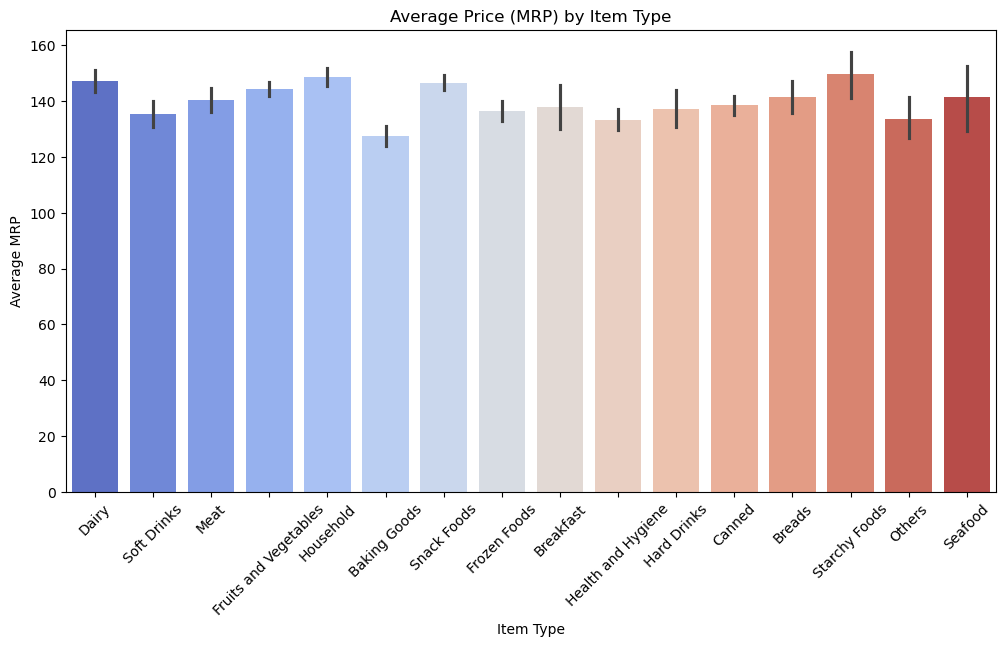

In [134]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x='Item_Type', y='Item_MRP', palette='coolwarm')
plt.title('Average Price (MRP) by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average MRP')
plt.xticks(rotation=45)
plt.show()

**From the above graph, the Starchy foods have high MRP when compared to other item types**

<Axes: ylabel='count'>

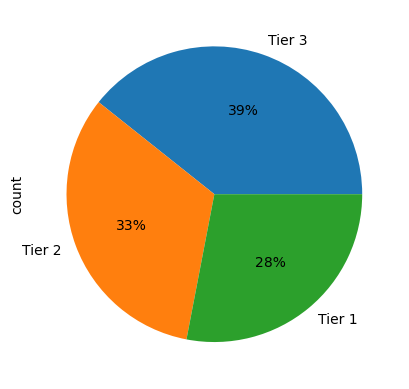

In [109]:
df1["Outlet_Location_Type"].value_counts().plot.pie(autopct="%.0f%%")

**from the above pie chart tier 3 cities have more stores when compared to tier 1 and to tier 2 cities**

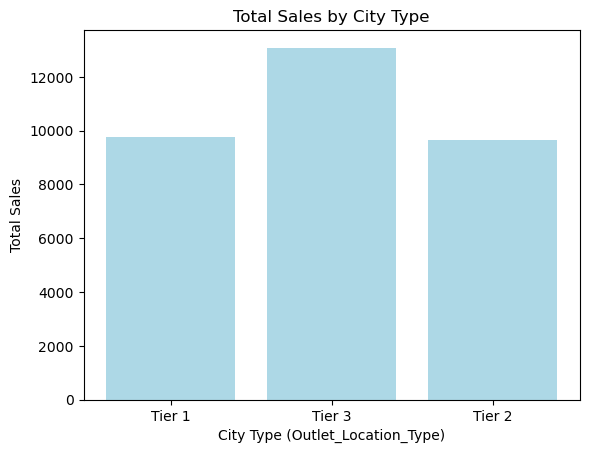

In [112]:

plt.bar(df1['Outlet_Location_Type'], df1['Item_Outlet_Sales'], color='lightblue')
plt.title("Total Sales by City Type")
plt.xlabel("City Type (Outlet_Location_Type)")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.show()



**from the above bar graph, tier 3 cities have more sales when compared to tire 2 and tier 1 cities. Tier 1 cities means urban cities. that need more stores. because of less stores in tier 1 cities the sales are less in tier 1 cities.**

**One of the main reason for having high sales on tier 3 cities is in tier 3 cities the operational costs are less and  allowing stores to stock more and sell more.**

In [114]:
df1["Outlet_Type"].unique()


array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

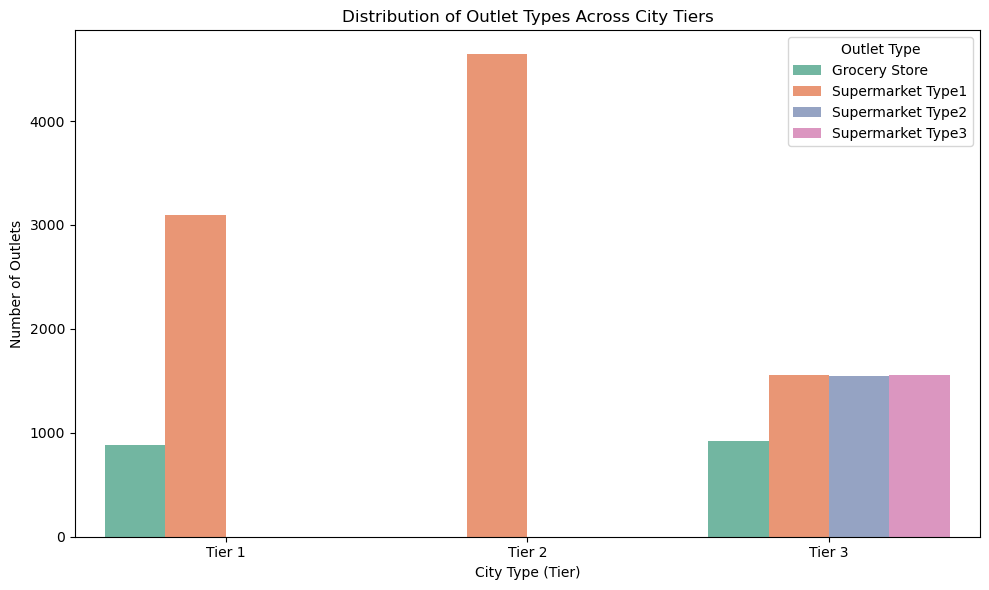

In [73]:

outlet_counts = df1.groupby(['Outlet_Location_Type', 'Outlet_Type']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(data=outlet_counts, x='Outlet_Location_Type', y='Count', hue='Outlet_Type',palette='Set2')

plt.title('Distribution of Outlet Types Across City Tiers')
plt.xlabel('City Type (Tier)')
plt.ylabel('Number of Outlets')
plt.legend(title='Outlet Type')
plt.tight_layout()
plt.show()


**from the above graph, tier 3 cities have all types of outlet types. but tier 2 and tier 1 cities have less type of outlets.**

### summary

  By increasing store presence that means adding more stores in tier 1 and tier 2 cities to expand reach and match the outlet density of tier 3 cities.

  Opening supermarket type stores in tier 1 and tier 2 cities that will have higher consumer trust and better performance.

  By conducting surveys in tier 1 and tier 2 cities to understand preferences of people and maintaining stock accordingly.
  
  Identifying low-selling products in urban stores and consider replacing them with high-margin or fast-moving items.